In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
%reload_ext autoreload

In [48]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io as io
import my_types, homography, warp, rectification, utils

In [49]:
DATA = Path("data")

# Pick Correspondences

In [99]:
im1 = my_types.to_img_arr("data/doll1.jpg")
im2 = my_types.to_img_arr("data/doll2.jpg")
im3 = my_types.to_img_arr("data/doll3.jpg")

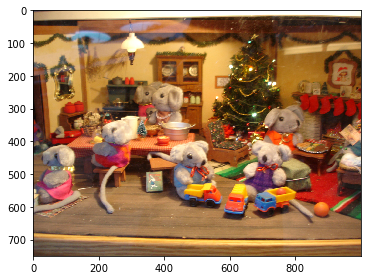

In [100]:
io.imshow(im2)

In [52]:
PICK_NEW = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"

if PICK_NEW:
    %matplotlib tk
    # im3_name = DATA / "doll3.jpg"
    im1_pts = utils.pick_points(im1_name, 8)
    im2_pts = utils.pick_points(im2_name, 8)
    # im3_pts = utils.pick_points(im3_name, 8)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

In [53]:
im1_pts

array([[710.53896104, 651.69155844],
       [712.56818182, 511.67532468],
       [720.68506494, 398.03896104],
       [864.75974026, 300.63636364],
       [803.88311688, 288.46103896],
       [970.27922078, 499.5       ],
       [588.78571429, 576.61038961],
       [548.2012987 , 462.97402597]])

In [54]:
im2_pts

array([[235.7012987 , 615.16558442],
       [247.87662338, 475.14935065],
       [243.81818182, 365.57142857],
       [393.98051948, 264.11038961],
       [347.30844156, 260.05194805],
       [479.20779221, 442.68181818],
       [124.09415584, 554.28896104],
       [ 69.30519481, 444.71103896]])

In [66]:
# find homographic transformation matrix
T = homography.homo_matrix(im1_pts, im2_pts)

(16, 8) 8
(16,)


/Users/aprilsin/GitHub/cs194-proj5/homography.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, *_ = np.linalg.lstsq(A, B)


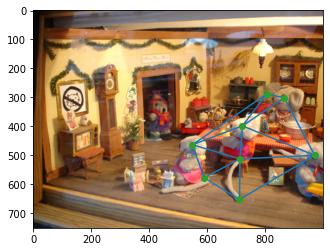

In [102]:
triangulation = warp.delaunay(im1_pts)
warp.plot_tri_mesh(im1, im1_pts, triangulation)

In [103]:
t = homography.target_pts(im1_pts, T)
t.shape

(8, 2)

In [106]:
warp1 = warp.warp_img(im1, im1_pts, t, triangulation)

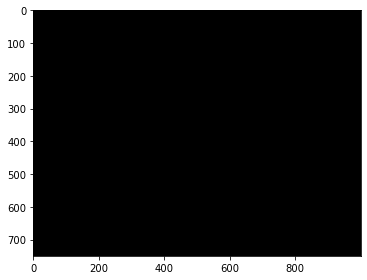

In [107]:
io.imshow(warp1)